<a href="https://colab.research.google.com/github/Nicolasalan/Perception-ros/blob/main/Perception_ROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Canny Filter**

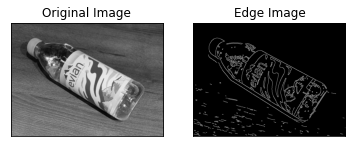

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#leia a imagem
img = cv2.imread("/content/image.jpg", 0) # caminho da imagem
# Encontre borda com detecção de borda Canny
edges = cv2.Canny(img, 100, 200)

# exibe resultados
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# **Sobel Filter**

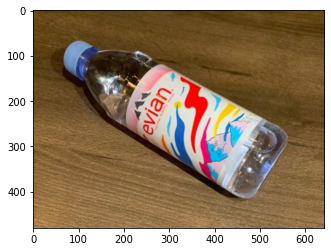

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

image = mpimg.imread('/content/image.jpg') # outra maneira de abrir imagem

plt.imshow(image)

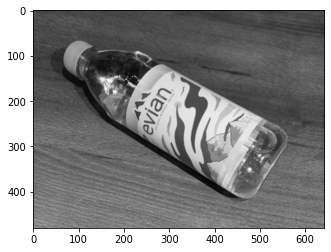

In [6]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

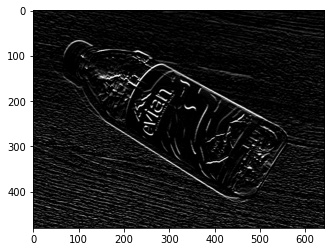

In [7]:
# Cria um kernel personalizado

# array 3x3 para detecção de borda
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Criar e aplicar um operador Sobel x
sobel_x = np.array([[-1, 0, 1],
                    [-2,0,2],
                    [-1, 0, 1]])


# Filtre a imagem usando filter2D, que possui entradas: (imagem em tons de cinza, profundidade de bits, kernel)
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

# **HOG Filter**

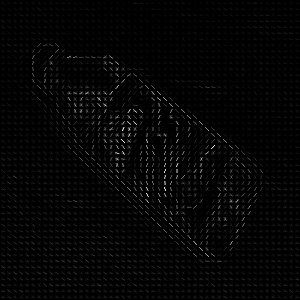

-1

In [43]:
import numpy as np
from skimage import exposure 
from skimage import feature
from google.colab.patches import cv2_imshow
import cv2
 
img = cv2.imread('/content/image.png')

imX = 300
imY = 300
img = cv2.resize(img,(imX,imY))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(H, hogImage) = feature.hog(gray, orientations=9, pixels_per_cell=(6, 6), cells_per_block=(2, 2), visualize=True)                                        

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")

cv2_imshow(hogImage)
cv2.waitKey(0) 

# **Matching**

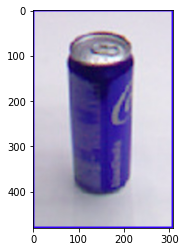

In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


image_1 = cv2.imread('/content/image.jpg',1)
image_2 = cv2.imread('/content/image2.jpg',1) 

gray_1 = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)

# Inicializar o detector de recurso ORB
orb = cv2.ORB_create(nfeatures = 10000000)

# Faça uma cópia da imagem original para exibir os pontos-chave encontrados pelo ORB
# Este é apenas um representante
preview_1 = np.copy(image_1)
preview_2 = np.copy(image_2)

# Crie outra cópia para exibir apenas pontos
dots = np.copy(image_1)

# Extraia os pontos-chave de ambas as imagens
train_keypoints, train_descriptor = orb.detectAndCompute(gray_1, None)
test_keypoints, test_descriptor = orb.detectAndCompute(gray_2, None)

# Desenhe os pontos-chave encontrados na imagem principal
cv2.drawKeypoints(image_1, train_keypoints, preview_1, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(image_1, train_keypoints, dots, flags=2)

# Inicializar o BruteForce Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Corresponda aos pontos característicos de ambas as imagens
matches = bf.match(train_descriptor, test_descriptor)

# As partidas com distâncias mais curtas são as que queremos.
matches = sorted(matches, key = lambda x : x.distance)

# Pegue alguns dos pontos correspondentes para desenhar
good_matches = matches[:1000] # ESTE VALOR FOI ALTERADO VOCÊ VERÁ MAIS TARDE PORQUE

# Passe os pontos de recurso
train_points = np.float32([train_keypoints[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
test_points = np.float32([test_keypoints[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# Crie uma máscara para capturar os pontos correspondentes
# Com a homografia estamos tentando encontrar perspectivas entre dois planos
# Usando o método RANSAC não determinístico
M, mask = cv2.findHomography(train_points, test_points, cv2.RANSAC,5.0)

# Capture a largura e a altura da imagem principal
h,w = gray_1.shape[:2]

# Crie uma matriz flutuante para a nova perspectiva
pts = np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

# Crie a perspectiva no resultado
dst = cv2.perspectiveTransform(pts,M)

# Desenhe as linhas correspondentes
dots = cv2.drawMatches(dots,train_keypoints,image_2,test_keypoints,good_matches, None,flags=2)

# Desenhe os pontos da nova perspectiva na imagem resultante (é considerada a caixa delimitadora)
result = cv2.polylines(image_2, [np.int32(dst)], True, (50,0,255),3, cv2.LINE_AA)

plt.imshow(result)
plt.show()